<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork900-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Question 1: Use yfinance to Extract Stock Data</li>
        <li>Question 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Question 3: Use yfinance to Extract Stock Data</li>
        <li>Question 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Question 5: Plot Tesla Stock Graph</li>
        <li>Question 6: Plot GameStop Stock Graph</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


In [ ]:
!pip install yfinance==0.1.67
!mamba install bs4==4.10.0 -y
!pip install nbformat==4.2.0

In [3]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## Define Graphing Function


In this section, we define the function `make_graph`. You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.


In [2]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

## Question 1: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [4]:
tesla = yf.Ticker("TSLA")

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to `max` so we get information for the maximum amount of time.


In [5]:
tesla_data = tesla.history(period="10y")

**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.


In [6]:
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2013-06-06 00:00:00-04:00,6.350000,6.618000,6.340667,6.490000,142663500,0.0,0.0
1,2013-06-07 00:00:00-04:00,6.533333,6.860000,6.446667,6.802667,160674000,0.0,0.0
2,2013-06-10 00:00:00-04:00,6.595333,6.834667,6.571333,6.670000,138429000,0.0,0.0
3,2013-06-11 00:00:00-04:00,6.545333,6.578667,6.270000,6.298000,110910000,0.0,0.0
4,2013-06-12 00:00:00-04:00,6.453333,6.698667,6.383333,6.515333,137890500,0.0,0.0


## Question 2: Use Webscraping to Extract Tesla Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named `html_data`.


In [7]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data = requests.get(url).text


Parse the html data using `beautiful_soup`.


In [69]:
mysoup = BeautifulSoup(html_data, "html5lib")

Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Quarterly Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [70]:
revenue_table = mysoup.find("table")
tesla_revenue = pd.read_html(str(revenue_table), flavor="bs4")[0]
tesla_revenue.columns = ["Date", "Revenue"]
tesla_revenue.head()


,Date,Revenue
0,2021,"$53,823"
1,2020,"$31,536"
2,2019,"$24,578"
3,2018,"$21,461"
4,2017,"$11,759"


Execute the following line to remove the comma and dollar sign from the `Revenue` column. 


In [71]:
# tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].str.replace(',', '')
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].str.replace('$', '')
tesla_revenue.head()

,Date,Revenue
0,2021,53823
1,2020,31536
2,2019,24578
3,2018,21461
4,2017,11759


Execute the following lines to remove an null or empty strings in the Revenue column.


In [72]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [73]:
tesla_revenue.tail()

,Date,Revenue
8,2013,2013
9,2012,413
10,2011,204
11,2010,117
12,2009,112


## Question 3: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


In [27]:
game_stop = yf.Ticker("GME")

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to `max` so we get information for the maximum amount of time.


In [29]:
gme_data = game_stop.history(period="10y")

**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.


In [37]:
gme_data.reset_index(inplace=True)

gme_data.head()



,level_0,index,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,0,0,2013-06-06 00:00:00-04:00,6.218713,6.370085,6.051313,6.165287,16494400,0.0,0.0
1,1,1,2013-06-07 00:00:00-04:00,6.339810,6.672828,6.329125,6.544607,28413200,0.0,0.0
2,2,2,2013-06-10 00:00:00-04:00,6.544608,6.589129,6.204466,6.231179,17507200,0.0,0.0
3,3,3,2013-06-11 00:00:00-04:00,6.519675,6.888310,6.487620,6.717349,35602800,0.0,0.0
4,4,4,2013-06-12 00:00:00-04:00,6.770775,6.804611,6.492963,6.516114,14868800,0.0,0.0


## Question 4: Use Webscraping to Extract GME Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data`.


In [38]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data = requests.get(url).text

Parse the html data using `beautiful_soup`.


In [39]:
moresoup = BeautifulSoup(html_data, "html5lib")

Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Quarterly Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column using a method similar to what you did in Question 2.


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [42]:
gme_revenue = moresoup.find("table")
gme_revenue = pd.read_html(str(gme_revenue), flavor="bs4")[0]
gme_revenue.columns = ["Date", "Revenue"]
# tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")
gme_revenue['Revenue'] = gme_revenue['Revenue'].str.replace(',', '')
gme_revenue['Revenue'] = gme_revenue['Revenue'].str.replace('$', '')


Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [43]:
gme_revenue.tail()

,Date,Revenue
11,2009,8806
12,2008,7094
13,2007,5319
14,2006,3092
15,2005,1843


In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_tesla_data(tesla_data):
    # Set style
    sns.set_style('darkgrid')
    
    # Create figure and axis
    fig, ax1 = plt.subplots(figsize=(16, 8))
    
    # Plot closing price
    ax1.plot(tesla_data['Date'], tesla_data['Close'], color='blue', linewidth=2)
    ax1.set_xlabel('Date', fontsize=12)
    ax1.set_ylabel('Closing Price ($)', color='blue', fontsize=12)
    ax1.tick_params('y', colors='blue')
    
    # Set title
    plt.title('Tesla Stock Price History', fontsize=16)
    
    # Set legend
    ax1.legend(['Closing Price ($USD)'], loc='upper left')
    
    # Rotate and align the tick labels so they look better
    fig.autofmt_xdate()
    
    # Display plot
    plt.show()


def plot_tesla_revenue(tesla_revenue):
    # Convert 'Revenue' to float
    tesla_revenue['Revenue'] = tesla_revenue['Revenue'].astype(float)
    
    # Set style
    sns.set_style('darkgrid')
    
    # Create figure and axis
    fig, ax = plt.subplots(figsize=(16, 8))
    
    # Plot revenue
    ax.plot(tesla_revenue['Date'], tesla_revenue['Revenue'], color='green', linewidth=2)
    ax.set_xlabel('Year', fontsize=12)
    ax.set_ylabel('Revenue ($US Millions)', color='green', fontsize=12)
    ax.tick_params('y', colors='green')
    
    # Set title
    plt.title('Tesla Revenue History', fontsize=16)
    
    # Set legend
    ax.legend(['Revenue ($US Millions)'], loc='upper left')
    
    # Rotate and align the tick labels so they look better
    fig.autofmt_xdate()
    
    # Display plot
    plt.show()






In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_gme_data(gme_data):
    # Set style
    sns.set_style('darkgrid')
    
    # Create figure and axis
    fig, ax1 = plt.subplots(figsize=(16, 8))
    
    # Plot closing price
    ax1.plot(gme_data['Date'], gme_data['Close'], color='blue', linewidth=2)
    ax1.set_xlabel('Date', fontsize=12)
    ax1.set_ylabel('Closing Price ($)', color='blue', fontsize=12)
    ax1.tick_params('y', colors='blue')
    
    # Set title
    plt.title('Game Stop Stock Price History', fontsize=16)
    
    # Set legend
    ax1.legend(['Closing Price ($USD)'], loc='upper left')
    
    # Rotate and align the tick labels so they look better
    fig.autofmt_xdate()
    
    # Display plot
    plt.show()


def plot_gme_revenue(gme_revenue):
    # Convert 'Revenue' to float
    gme_revenue['Revenue'] = gme_revenue['Revenue'].astype(float)
    
    # Set style
    sns.set_style('darkgrid')
    
    # Create figure and axis
    fig, ax = plt.subplots(figsize=(16, 8))
    
    # Plot revenue
    ax.plot(gme_revenue['Date'], gme_revenue['Revenue'], color='green', linewidth=2)
    ax.set_xlabel('Year', fontsize=12)
    ax.set_ylabel('Revenue ($US Millions)', color='green', fontsize=12)
    ax.tick_params('y', colors='green')
    
    # Set title
    plt.title('Game Stop Revenue History', fontsize=16)
    
    # Set legend
    ax.legend(['Revenue ($US Millions)'], loc='upper left')
    
    # Rotate and align the tick labels so they look better
    fig.autofmt_xdate()
    
    # Display plot
    plt.show()

## Question 5: Plot Tesla Stock Graph


Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(tesla_data, tesla_revenue, 'Tesla')`. Note the graph will only show data upto June 2021.


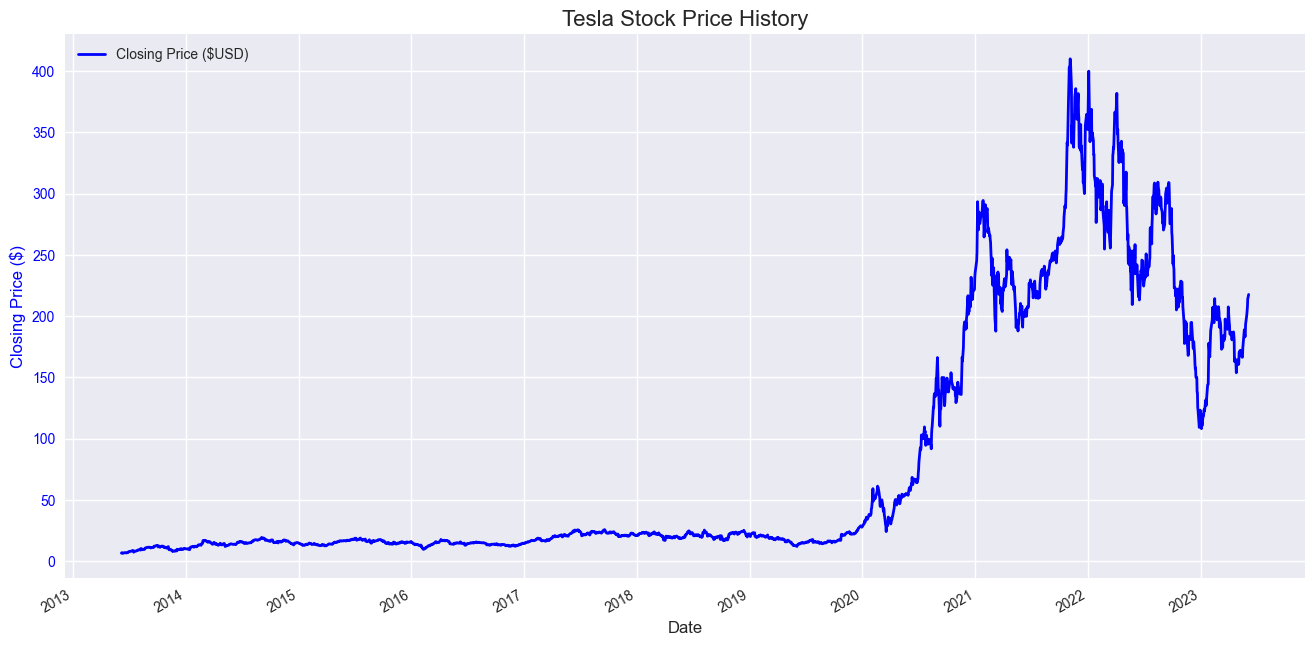

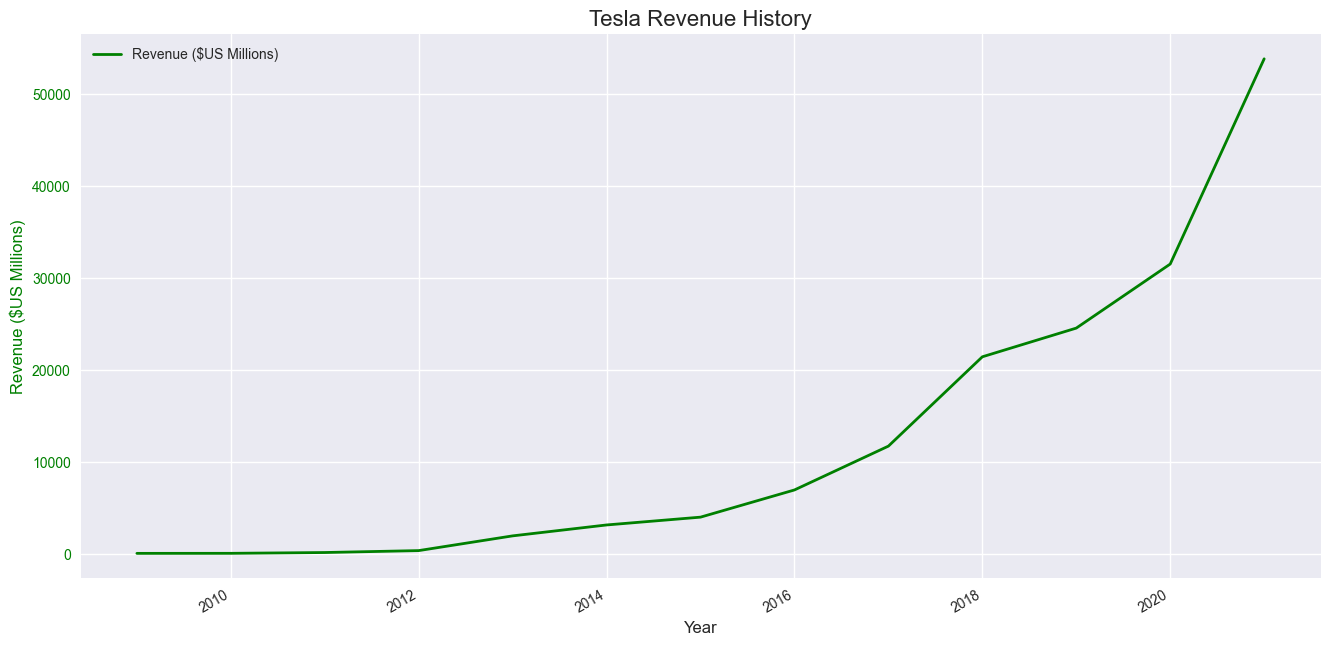

In [103]:
# the given function sucked so I made a new one
plot_tesla_data(tesla_data)
plot_tesla_revenue(tesla_revenue)




## Question 6: Plot GameStop Stock Graph


Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`. Note the graph will only show data upto June 2021.


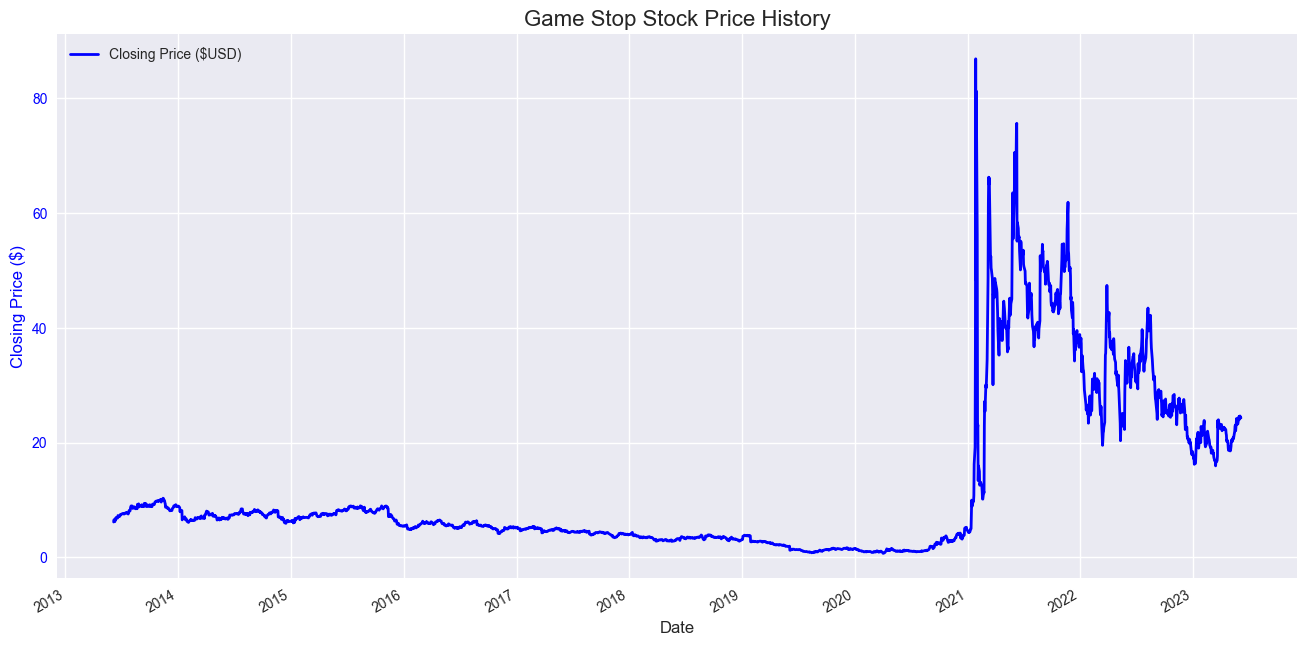

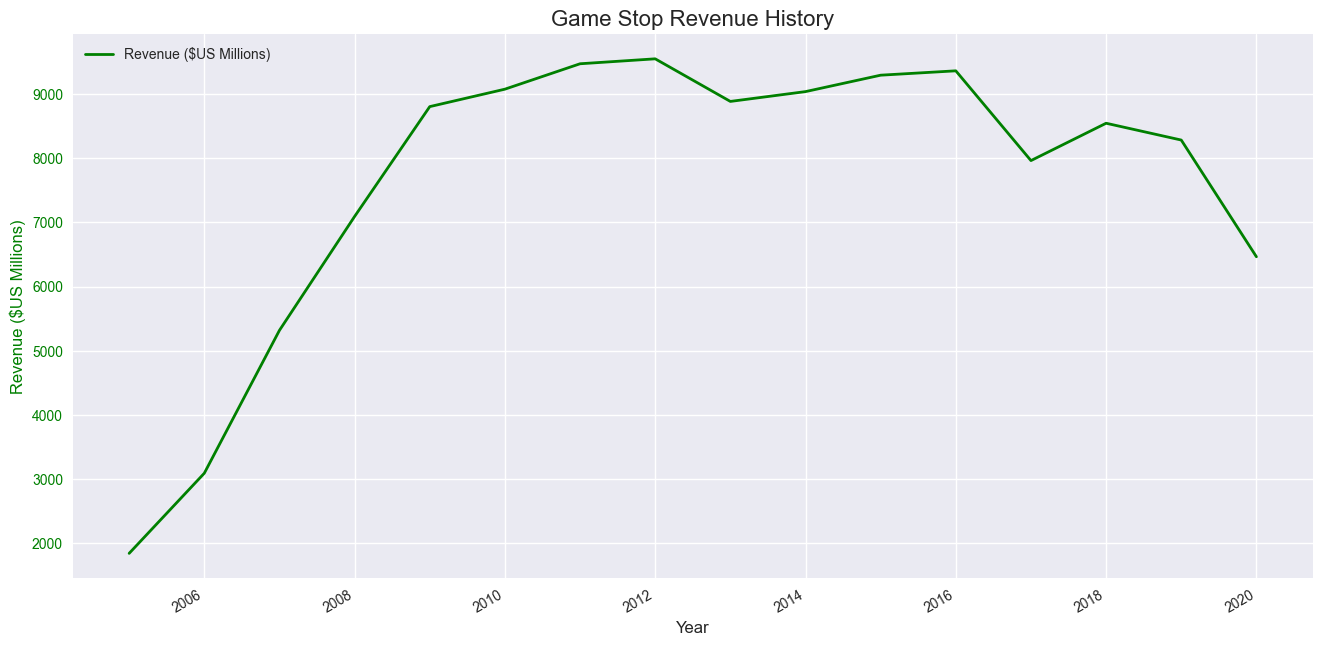

In [104]:
plot_gme_data(gme_data)
plot_gme_revenue(gme_revenue)

<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork900-2022-01-01">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

Azim Hirjani


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description        |
| ----------------- | ------- | ------------- | ------------------------- |
| 2022-02-28        | 1.2     | Lakshmi Holla | Changed the URL of GameStop |
| 2020-11-10        | 1.1     | Malika Singla | Deleted the Optional part |
| 2020-08-27        | 1.0     | Malika Singla | Added lab to GitLab       |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
